## Welcome to the Member Churn Predictor!

In [2]:
## Data exploration and analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Logistic Regression model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
## User interface:
import ipywidgets as widgets
from IPython.display import display

To start, we have to import a csv file that we can use to train our model:

In [7]:
data= pd.read_csv('Churn_data')

Next, we will look at some of the information about our data:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   PaperlessBilling         7043 non-null   int64  
 5   MonthlyCharges           7043 non-null   float64
 6   TotalCharges             7043 non-null   float64
 7   Churn                    7043 non-null   int64  
 8   Credit card (automatic)  7043 non-null   int64  
 9   Electronic check         7043 non-null   int64  
 10  Mailed check             7043 non-null   int64  
 11  Male                     7043 non-null   int64  
 12  One year                 7043 non-null   int64  
 13  Two year                 7043 non-null   int64  
 14  Engagement              

The names of the columns suggest the csv file consists of customer information relating specifically to recurring payments. We can explore the data more:

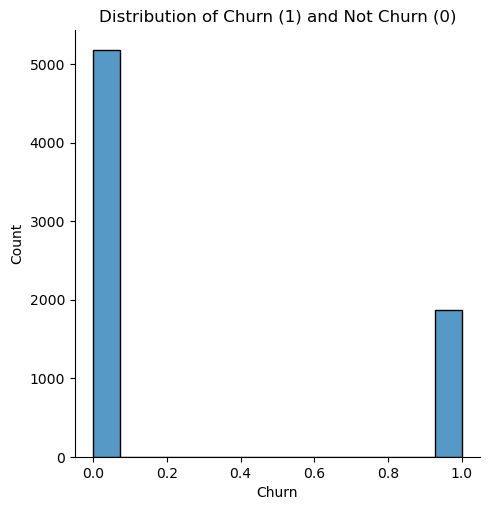

In [66]:
## Distribution of Churn v Not Churn
sns.displot(data= data, x='Churn')
plt.title('Distribution of Churn (1) and Not Churn (0)')
plt.show()

Here we can see that out of our 7,043 entries, over 5,000 of them result in 'Not Churn,' which leaves less than 1,800 in the 'Churn' class. This imbalance can lead to inaccuracies in our predictions, but we will look more at that later.

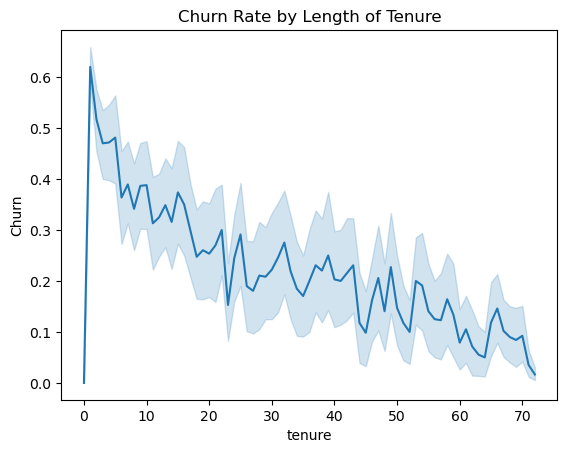

In [71]:
## Churn rate by tenure
sns.lineplot(data=data, x='tenure', y='Churn')
plt.title('Churn Rate by Length of Tenure')
plt.show()
# As tenure increases, churn goes down and customers are likely to stay

The above lineplot illustrates the relationship between churn rate and the member's length of tenure (in months). As you can see, the churn leans closer to 0 (which means 'not churn') as the tenure length increases. This means that the longer a member maintains their membership status, the more likely they are to renew. This makes sense considering they needed to renew their memberships in order to have a longer tenure length.

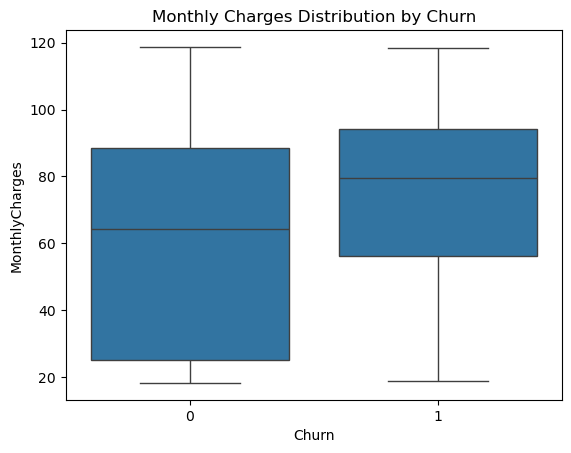

In [79]:
## Distribution of Monthly Charges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

This box plot shows the distribution of monthly charges by churn status. On average, members who churn tend to pay a higher monthly charge than those that do not churn. 

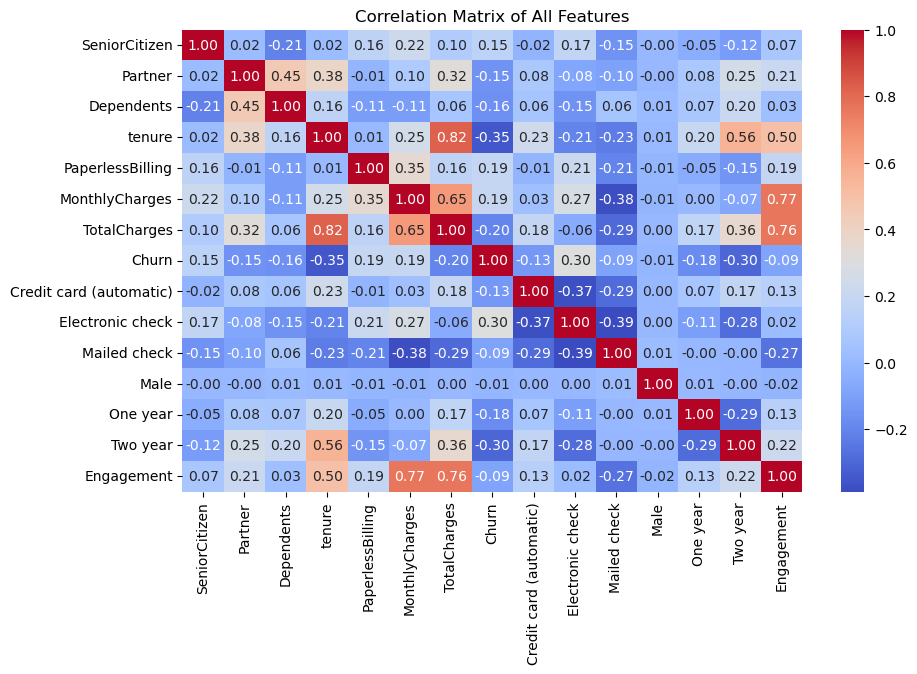

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

And here we have a correlation matrix of all of our columns. If we look for 'Churn,' we can see that the number farthest from 0 is -0.35 (tenure). This means that Churn and tenure have a negative correlation and that tenure is the most highly correlated feature with Churn. This correlation is also visible in our above lineplot ("Churn Rate by Length of Tenure"), which can be noted by the negative trend.

## Logistic Regression Model

With Logistic Regression, we will use a set of independent variables to predict a dependent variable. In our case, the dependent variable we want to predict is 'Churn.' We can set our X and y variables to be used in our logistic regression model like this:

In [35]:
X= data.drop(['Churn'], axis=1)
y= data['Churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   PaperlessBilling         7043 non-null   int64  
 5   MonthlyCharges           7043 non-null   float64
 6   TotalCharges             7043 non-null   float64
 7   Credit card (automatic)  7043 non-null   int64  
 8   Electronic check         7043 non-null   int64  
 9   Mailed check             7043 non-null   int64  
 10  Male                     7043 non-null   int64  
 11  One year                 7043 non-null   int64  
 12  Two year                 7043 non-null   int64  
 13  Engagement               7043 non-null   float64
dtypes: float64(3), int64(11)

Here, we set our X to our set of independent variables, which happens to be every column other than the 'Churn' column. Our y variable is the dependent variable and is the one we are trying to predict. This is set to the 'Churn' column.   

Next, we have to split our dataset into separate training and testing sets. The training set will be used to train our model, and the testing set will be used to validate after it is trained. This ensures the data used for testing has not yet been seen by our model:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we create our model and train the model using our training dataset:

In [22]:
logmodel = LogisticRegression(max_iter=10000, class_weight='balanced')
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

Here, the "class_weight='balanced'" argument helps our model's performance by addressing the imbalance in our graph that we saw earlier ('Distribution of Churn (1) and Not Churn (0)'). After our model is trained, we run our predictions using our X_test data. This data has not been seen by our model yet and we are trying to see how close our model's predictions line up with our y_test data. We can then print a classifaction report that compares the predictions our model made with the actual values in the y_test 'Churn' column to see how accurate our model is:

In [38]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1539
           1       0.52      0.85      0.65       574

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.76      2113



To interpret our results we will need to understand some terms:

- precision: The percentage of predicted postive cases that our model predicted correctly
- recall: Out of the actual positive cases, the percentage that were correctly identified
- f1-score: A balance between precision and recall
- support: The distribution of our classes (churn and not churn)
- accuracy: The overall percentage of correctly predicted cases

If we look at class 0 (non-churners), the precision is 93% and recall is 71% which suggests our model is pretty good at identifying those in this class. This makes sense because our dataset had about 3 times as many class 0 cases to train with.  

With class 1, we can see the precision isn't very high (52%), which means there are a good amount of false positives (people that were expected to churn, but didn't). However, the recall of 85% means that our model was able to capture most cases where churn did occur. Given that we are trying to catch people at risk of churning in order to reduce overall churn, this is great.  

Lastly, our overall accuracy of 75% meets our target goal of 60% accuracy.

**Fill out the form below to try out Member Churn Predictor for yourself.** Below the form is an explanation of each input:

In [95]:
#define input widgets

senior_citizen_widget = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    value=0,
    description='Senior Citizen:', 
    style={'description_width': 'initial'}
)
partner_widget = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    value=0,
    description='Partner:', 
    style={'description_width': 'initial'}
)
dependents_widget = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    value=0,
    description='Dependents:', 
    style={'description_width': 'initial'}
)
tenure_widget = widgets.IntSlider(
    min=0, 
    max=72, 
    step=1, 
    description = "Tenure (months): ",
    value=6, 
    style={'description_width': 'initial'}
)
paperless_billing_widget = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    value=0,
    description='Paperless Billing:', 
    style={'description_width': 'initial'}
)
monthly_charges_widget = widgets.FloatText(
    description = "Monthly Charges: ",
    value=45, 
    style={'description_width': 'initial'}
)
total_charges_widget = widgets.FloatText(
    description = "Total Charges: ",
    value=45, 
    style={'description_width': 'initial'}
)
payment_method_widget = widgets.Dropdown(
    options=['Credit card (automatic)', 'Electronic check', 'Mailed check'], 
    description='Payment Method: ', 
    style={'description_width': 'initial'}
)
sex_widget = widgets.Dropdown(
    options=[('Male', 1), ('Female', 0)], 
    description='Sex: ', 
    style={'description_width': 'initial'}
)
contract_length_widget = widgets.Dropdown(
    options=['One year', 'Two year', 'Month-to-month'], 
    description='Contract Type:', 
    style={'description_width': 'initial'}
)
engagement_widget = widgets.IntSlider(
    value=4, 
    min=0, 
    max=8, 
    step=1, 
    description="Customer engagement level: ", 
    style={'description_width': 'initial'}
)

# Create Submit button and Output widget
submit_button = widgets.Button(description="Predict!")
output_widget = widgets.Output()

def make_prediction(button):
    # capture output and clear previous output
    with output_widget:
        output_widget.clear_output()

        # get values from the widgets
        SeniorCitizen = senior_citizen_widget.value
        Partner = partner_widget.value
        Dependents = dependents_widget.value
        tenure = tenure_widget.value
        PaperlessBilling = paperless_billing_widget.value
        MonthlyCharges = monthly_charges_widget.value
        TotalCharges = total_charges_widget.value
    
        Credit_card =  1 if payment_method_widget.value == 'Credit Card (automatic)' else 0
        Electronic_check =  1 if payment_method_widget.value == 'Electronic check' else 0
        Mailed_check =  1 if payment_method_widget.value == 'Mailed check' else 0
        
        Male = sex_widget.value 
        
        One_year = 1 if contract_length_widget.value == 'One year' else 0
        Two_year = 1 if contract_length_widget.value == 'Two year' else 0
        
        Engagement = engagement_widget.value
    
        input_data = np.array([[SeniorCitizen, Partner, Dependents, tenure, 
                                PaperlessBilling, MonthlyCharges, TotalCharges,
                                Credit_card, Electronic_check, Mailed_check, Male,
                                One_year, Two_year, Engagement]])

        ## convert input data to dataframe with feature names our model was trained on (gets rid of error)
        feature_names = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 
                 'MonthlyCharges', 'TotalCharges', 'Credit card (automatic)', 
                 'Electronic check', 'Mailed check', 'Male', 'One year', 'Two year', 
                 'Engagement']
        input_data_df = pd.DataFrame(input_data, columns=feature_names)

        #Make prediction
        prediction = logmodel.predict(input_data_df)[0]

        # Display prediction in understandable way
        if prediction == 1:
            print("The member is likely to churn.")
        else:
            print("The member is likely to renew!")

# Run function associated with submit button
submit_button.on_click(make_prediction)

# Display all widgets
display(senior_citizen_widget, partner_widget, dependents_widget, tenure_widget, paperless_billing_widget, monthly_charges_widget, total_charges_widget, payment_method_widget, sex_widget, contract_length_widget, engagement_widget, submit_button, output_widget)

Dropdown(description='Senior Citizen:', index=1, options=(('Yes', 1), ('No', 0)), style=DescriptionStyle(descr…

Dropdown(description='Partner:', index=1, options=(('Yes', 1), ('No', 0)), style=DescriptionStyle(description_…

Dropdown(description='Dependents:', index=1, options=(('Yes', 1), ('No', 0)), style=DescriptionStyle(descripti…

IntSlider(value=6, description='Tenure (months): ', max=72, style=SliderStyle(description_width='initial'))

Dropdown(description='Paperless Billing:', index=1, options=(('Yes', 1), ('No', 0)), style=DescriptionStyle(de…

FloatText(value=45.0, description='Monthly Charges: ', style=DescriptionStyle(description_width='initial'))

FloatText(value=45.0, description='Total Charges: ', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Payment Method: ', options=('Credit card (automatic)', 'Electronic check', 'Mailed check…

Dropdown(description='Sex: ', options=(('Male', 1), ('Female', 0)), style=DescriptionStyle(description_width='…

Dropdown(description='Contract Type:', options=('One year', 'Two year', 'Month-to-month'), style=DescriptionSt…

IntSlider(value=4, description='Customer engagement level: ', max=8, style=SliderStyle(description_width='init…

Button(description='Predict!', style=ButtonStyle())

Output()

- **Senior Citizen:** Are they a senior citizen?
- **Partner:** Do they have a domestic partner/spouse?
- **Dependents:** Do they have any dependents?
- **Tenure:** How long have they had an actiev membership (in months)?
- **Paperless Billing:** Are they enrolled in paperless billing?
- **Monthly Charges:** How much do they pay monthly?
- **Total Charges:** How much have they paid to date in total?
- **Payment Method:** What method of payment do they use?
- **Sex:** What is their sex?
- **Contract type:** What type of membership are they enrolled in?
- **Customer engagement level:** On a scale of 0 to 8, how much use does the customer get out of the facilities? Do they use any other services? 